### Project 2: (10 points)
##### Total (20 points) --> your total will divided by 2 to get 10 points.

To demonstrate clustring, we will be use an adapted version of the glass dataset from the University of California – Irvine.
This data contains 218 observations and 9 features corresponding to the percent weight of various oxides found in glass:

* RI: refractive index
* Na: weight percent in sodium
* Mg: weight percent in magnesium
* Al: weight percent in aluminum
* Si: weight percent in silicon
* K: weight percent in potassium
* Ca: weight percent in calcium
* Ba: weight percent in barium
* Fe: weight percent in iron

In this case study, we will use the refractive index (RI) and weight percent in each oxide to segment the glass type.

**Dataset:**
You can find the dataset (glass.csv) under the datasets section on the Canvas.

### Step to do:

        1. Importing Packages Required:

In [1]:
#
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

    2. Read the Data in the Memory.

In [2]:
glass_df = pd.read_csv('glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
213,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0
214,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0
215,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
216,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0


    3. Print the Size of the Dataset and Printing the First Few Rows of the Dataset

In [3]:
glass_df.size

1962

In [4]:
print(glass_df.head(10))

        RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11


    4. Look for some basic data frame information  ( 1 point)

In [5]:
glass_df.shape

(218, 9)

In [6]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      218 non-null    float64
 1   Na      218 non-null    float64
 2   Mg      218 non-null    float64
 3   Al      218 non-null    float64
 4   Si      218 non-null    float64
 5   K       218 non-null    float64
 6   Ca      218 non-null    float64
 7   Ba      218 non-null    float64
 8   Fe      218 non-null    float64
dtypes: float64(9)
memory usage: 15.5 KB


In [7]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000
mean,1.518109,13.599037,2.330505,1.570367,72.74555,0.431468,8.799083,0.364358,0.049679
std,0.003002,0.873300,1.643503,0.539291,0.76070,0.435318,1.307588,0.647118,0.086666
min,1.511310,10.730000,0.000000,0.290000,69.81000,0.000000,5.430000,0.000000,0.000000
25%,1.516333,12.990000,0.000000,1.230000,72.39250,0.052500,8.270000,0.000000,0.000000
50%,1.517390,13.440000,3.430000,1.445000,72.90500,0.540000,8.590000,0.000000,0.000000
75%,1.518467,14.320000,3.580000,1.930000,73.13500,0.610000,9.015000,0.610000,0.090000
max,1.533930,15.790000,4.490000,2.880000,75.18000,2.700000,16.190000,3.150000,0.350000


    5. Remove any possible order effects in the data by shuffle the rows prior to building any models and save it as a new data frame object.  ( 1 point)


In [8]:
glas_shuffle = glass_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
glas_shuffle

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22
1,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
2,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00
3,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00
4,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00
...,...,...,...,...,...,...,...,...,...
213,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
214,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
215,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19
216,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00


    6. Transform each observation into a z-score  ( 1 point)

In [10]:
#
glassdf_zsc = glass_df.apply(zscore)

In [11]:
glassdf_zsc

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.968626,0.047014,1.316983,-0.874202,-1.272213,-0.855289,-0.037623,-0.564343,-0.574543
1,-0.166609,0.333944,0.774210,-0.390978,-0.020489,0.111743,-0.742828,-0.564343,-0.574543
2,-0.644076,-0.079235,0.743717,-0.056439,0.322088,-0.095478,-0.781154,-0.564343,-0.574543
3,-0.149915,-0.446504,0.829097,-0.521077,-0.178602,0.318964,-0.443882,-0.564343,-0.574543
4,-0.230049,-0.377641,0.786407,-0.614005,0.440672,0.272915,-0.558861,-0.564343,-0.574543
...,...,...,...,...,...,...,...,...,...
213,-0.553925,1.539048,-1.421274,0.556884,0.480200,-0.993436,-0.098945,1.573099,-0.574543
214,0.067115,0.907803,-1.421274,0.463956,0.150799,2.253028,-1.785304,3.896405,-0.574543
215,-0.570619,0.884848,-1.421274,2.173826,0.137623,-0.993436,0.498946,0.272047,-0.574543
216,-0.627381,0.620873,-1.421274,2.434023,-0.178602,-0.809240,0.291983,1.077460,-0.574543


In [12]:
scaler = StandardScaler()
glass_scaled = scaler.fit_transform(glas_shuffle)

In [13]:
glass_scaled

array([[-0.52053556, -0.97445462,  0.31681774, ..., -0.00696203,
        -0.39396738,  1.96978677],
       [-0.57061946,  0.88484838, -1.42127375, ...,  0.49894567,
         0.27204709, -0.57454325],
       [-0.45709596, -0.83672847,  0.74981597, ..., -0.62018349,
        -0.56434318, -0.57454325],
       ...,
       [-0.74424363, -0.54979899,  0.65833747, ..., -0.31357276,
        -0.56434318,  1.62283268],
       [ 1.85010218,  2.5146078 , -0.30523606, ..., -0.14493686,
         2.03775988, -0.57454325],
       [ 0.03038729, -1.12365794,  0.26193064, ...,  0.47594986,
        -0.56434318,  1.73848404]], shape=(218, 9))

    7. Perform hierarchical clustering using the linkage function on scaled_features with complete method.  ( 1 point)

In [14]:
# create linkage model
glass_hc = linkage(glass_scaled, method = 'complete')

Now that the HCA model has been built, we will continue with the analysis by visualizing clusters using a dendrogram and using the visualization to generate predictions.

    8. Display the dendrogram by plotting the HCA model:  ( 1 point)
    - the leaf_rotation is 90 and , leaf_font_size is 6

Text(0.5, 1.0, 'Dendrogram for Glass Data')

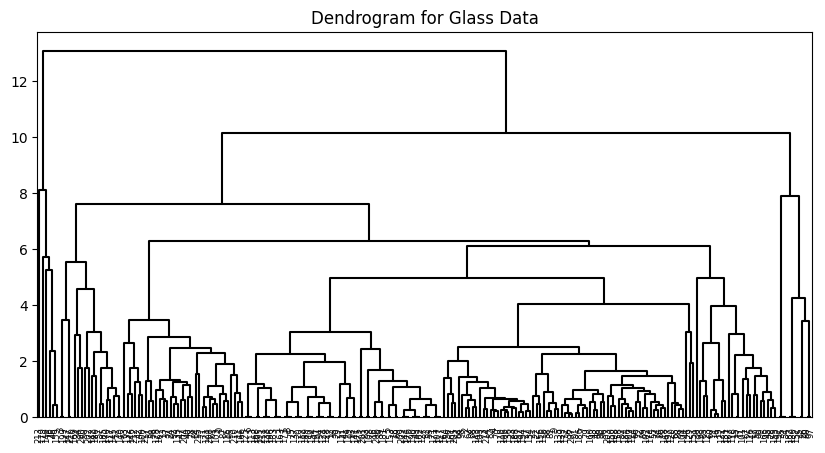

In [15]:
# plot dendrogram:
plt.figure(figsize=(10,5))
glass_ward = dendrogram(glass_hc, leaf_rotation=90, leaf_font_size=6, link_color_func=lambda x: 'black')
plt.title('Dendrogram for Glass Data')

    9. interpret the HCA dendrogram, utilizing HCA clusters our data into three groups  ( 1 point)

Notes:
In the dendrogram, the vertical lines represent clusters, and the height at which they merge or split indicates the level of similarity or distance between the data points or clusters. 
The longer the vertical lines, the greater the dissimilarity between the merged clusters.

In [16]:
ac = AgglomerativeClustering(3, linkage='ward')
ac_clusters = ac.fit_predict(glass_scaled)

HCA has drawbacks include:

1. Vagueness in terms of the termination criteria (that is, when to finalize the number of clusters)
2. The algorithm cannot adjust once the clustering decisions have been made
3. Can be very computationally expensive to build HCA models on large datasets with many features

To address some of the HCA shortcomings,  use k-means, which has the ability to adjust when the clusters have been initially generated. It is more computationally frugal than HCA.

    10. Compute Silhouette score to measure how close observations within a cluster and plot the results.  ( 2 points)

In [17]:
print("Silhouette sore: ", silhouette_score(glass_scaled, ac_clusters))

Silhouette sore:  0.4005284515298445


    11. apply k-Means Clustering for Optimal Number of Clusters  ( 1 point)

In [18]:
km = KMeans(3, random_state = 42)
glas_shuffle['Cluster'] = km.fit_predict(glass_scaled)

    12. print the number of glasses that fall within each of clusters. ( 2 points)

In [19]:
print("\nNumber of glasses per cluster:")
print(glas_shuffle['Cluster'].value_counts())


Number of glasses per cluster:
Cluster
0    121
1     59
2     38
Name: count, dtype: int64


    13. Using PCA to Transform Group-Related Features into Components  ( 1 point)

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(glass_scaled)

glas_shuffle['PCA1'] = pca_components[:, 0]
glas_shuffle['PCA2'] = pca_components[:, 1]

    14. Get proportion of explained variance in each component ( 2 points)

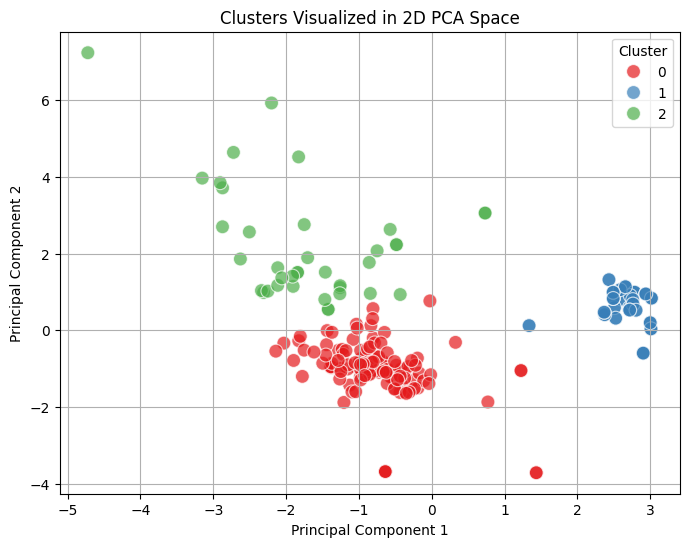

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=glas_shuffle, s=100, alpha=0.7)
plt.title('Clusters Visualized in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

    15. Get the cumulative sum of explained variance by each component and plot the result.  ( 2 points)

In [22]:
print("Explained Variance Ratio by PCA components:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio by PCA components:
[0.35314362 0.25053256]


    16. Fit the PCA model with the best number of components ( 2 points)

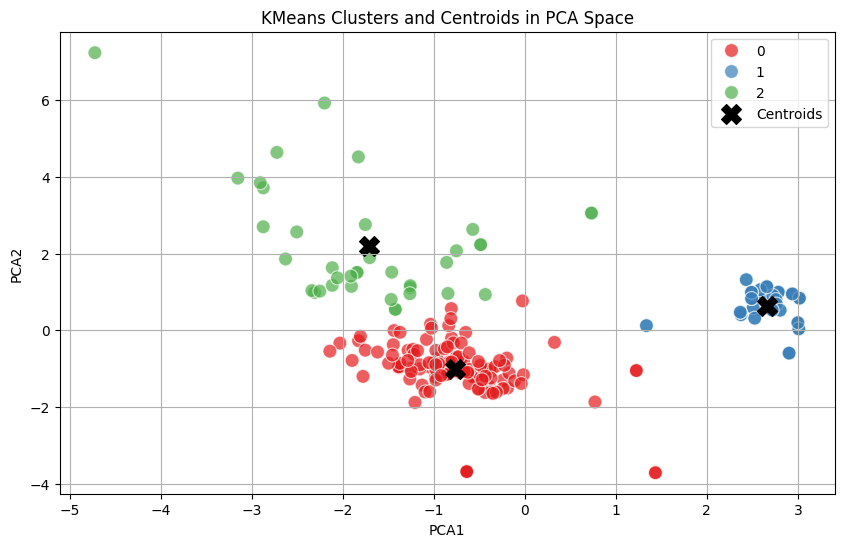

In [23]:
centroids = km.cluster_centers_
centroids_2d = pca.transform(centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot( x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=glas_shuffle, s=100, alpha=0.7)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],c='black', s=200, marker='X', label='Centroids')
plt.title('KMeans Clusters and Centroids in PCA Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

    17. Plot the first and second components ( 2 points)

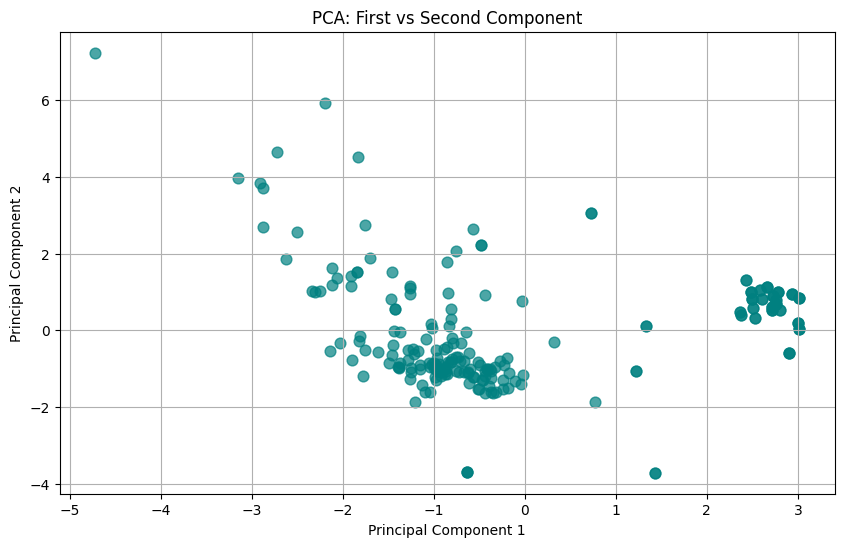

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(glas_shuffle['PCA1'], glas_shuffle['PCA2'], alpha=0.7, color='teal', s=60)
plt.title('PCA: First vs Second Component')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()